# Data Upload 

- (All graphs are coded twice- to also show the code in Matplotlib)#

In [2]:
import zipfile
import pandas as pd
import numpy as np
import seaborn as sn
import plotly as plt
import os
import io


In [3]:
!pip install pywebview


In [4]:
zipped_file_path = "C:\\Users\\zeine\\Downloads\\archive (1).zip"

In [5]:
import zipfile

# Replace with the actual path to your zipped folder
zipped_file_path = "C:/Users/zeine/Downloads/archive (1).zip"

# Open the zip file in read mode
with zipfile.ZipFile(zipped_file_path, 'r') as zip_ref:
  # Get a list of all file names in the archive
  file_names = zip_ref.namelist()

# Print the list of file names
print(file_names)

['AAF.csv', 'AAL.csv', 'ABF.csv', 'ADM.csv', 'AHT.csv', 'ANTO.csv', 'ATST.csv', 'AUTO.csv', 'AV.csv', 'AZN.csv', 'BA.csv', 'BARC.csv', 'BATS.csv', 'BDEV.csv', 'BEZ.csv', 'BKG.csv', 'BLND.csv', 'BNZL.csv', 'BP.csv', 'BRBY.csv', 'BT.A.csv', 'CCC.csv', 'CCEP.csv', 'CNA.csv', 'CPG.csv', 'CRDA.csv', 'CTEC.csv', 'DGE.csv', 'DPLM.csv', 'EDV.csv', 'EXPN.csv', 'EZJ.csv', 'FCIT.csv', 'FRAS.csv', 'FRES.csv', 'GSK.csv', 'HIK.csv', 'HL.csv', 'HLMA.csv', 'HLN.csv', 'HSBA.csv', 'HWDN.csv', 'ICP.csv', 'IHG.csv', 'III.csv', 'IMB.csv', 'IMI.csv', 'INF.csv', 'ITRK.csv', 'JD.csv', 'KGF.csv', 'LAND.csv', 'LGEN.csv', 'LLOY.csv', 'LMP.csv', 'LSEG.csv', 'MKS.csv', 'MNDI.csv', 'MNG.csv', 'MRO.csv', 'NG.csv', 'NWG.csv', 'NXT.csv', 'OCDO.csv', 'PCT.csv', 'PHNX.csv', 'PRU.csv', 'PSN.csv', 'PSON.csv', 'REL.csv', 'RIO.csv', 'RKT.csv', 'RMV.csv', 'RR.csv', 'RS1.csv', 'RTO.csv', 'SBRY.csv', 'SDR.csv', 'SGE.csv', 'SGRO.csv', 'SHEL.csv', 'SMDS.csv', 'SMIN.csv', 'SMT.csv', 'SN.csv', 'SPX.csv', 'SSE.csv', 'STAN.csv', 'SV

In [6]:
# Open the zip file in read mode
with zipfile.ZipFile(zipped_file_path, 'r') as zip_ref:
  all_data = {}
  
  # Loop through all files in the zip and read only CSV files
  for filename in zip_ref.namelist():
    if filename.endswith('.csv'):
      with zip_ref.open(filename) as file:
        data = pd.read_csv(io.BytesIO(file.read()))
        all_data[filename] = data

In [7]:
print(all_data[file_names[0]].head())

  ticker        date   open   high    low  close
0    AAF  2019-06-28  77.00  77.00  67.00   67.8
1    AAF  2019-07-01  68.05  74.37  68.05   71.0
2    AAF  2019-07-02  72.12  72.50  72.00   72.0
3    AAF  2019-07-03  73.00  73.00  72.03   72.1
4    AAF  2019-07-04  73.12  73.12  72.26   72.4


In [8]:
all_data

{'AAF.csv':      ticker        date   open   high    low  close
 0       AAF  2019-06-28  77.00  77.00  67.00  67.80
 1       AAF  2019-07-01  68.05  74.37  68.05  71.00
 2       AAF  2019-07-02  72.12  72.50  72.00  72.00
 3       AAF  2019-07-03  73.00  73.00  72.03  72.10
 4       AAF  2019-07-04  73.12  73.12  72.26  72.40
 ...     ...         ...    ...    ...    ...    ...
 1184    AAF  2024-03-06  96.80  98.95  96.80  97.00
 1185    AAF  2024-03-07  97.30  97.30  94.40  94.40
 1186    AAF  2024-03-08  95.10  95.85  92.85  95.75
 1187    AAF  2024-03-11  95.05  95.95  93.75  93.85
 1188    AAF  2024-03-12  94.85  97.70  94.80  95.05
 
 [1189 rows x 6 columns],
 'AAL.csv':      ticker        date     open     high      low    close
 0       AAL  1999-05-24   872.06   872.06   872.06   872.06
 1       AAL  1999-05-25   842.25   842.25   842.25   842.25
 2       AAL  1999-05-26   825.85   829.95   809.44   812.45
 3       AAL  1999-05-27   810.81   820.38   776.62   783.73
 4       

In [9]:
import pandas as pd

# Create an empty DataFrame to store the final data
final_df = pd.DataFrame()

# Iterate through each key-value pair in all_data
for filename, data in all_data.items():
  # Read the DataFrame from the CSV data
  df = pd.read_csv(io.BytesIO(data.to_csv(index=False).encode()))
  # Add a new column named 'filename' to indicate the source file
  df['filename'] = filename
  # Concatenate the DataFrame from the current file to the final DataFrame
  final_df = pd.concat([final_df, df], ignore_index=True)  # Avoid duplicate indexing

print(final_df)

       ticker        date     open     high      low   close filename
0         AAF  2019-06-28    77.00    77.00    67.00    67.8  AAF.csv
1         AAF  2019-07-01    68.05    74.37    68.05    71.0  AAF.csv
2         AAF  2019-07-02    72.12    72.50    72.00    72.0  AAF.csv
3         AAF  2019-07-03    73.00    73.00    72.03    72.1  AAF.csv
4         AAF  2019-07-04    73.12    73.12    72.26    72.4  AAF.csv
...       ...         ...      ...      ...      ...     ...      ...
766770    WTB  2024-03-06  3175.00  3217.00  3172.00  3204.0  WTB.csv
766771    WTB  2024-03-07  3210.00  3269.00  3210.00  3224.0  WTB.csv
766772    WTB  2024-03-08  3224.00  3234.00  3189.00  3226.0  WTB.csv
766773    WTB  2024-03-11  3219.00  3282.00  3218.00  3274.0  WTB.csv
766774    WTB  2024-03-12  3297.00  3306.00  3270.00  3302.0  WTB.csv

[766775 rows x 7 columns]


In [10]:
final_df

,ticker,date,open,high,low,close,filename
0,AAF,2019-06-28,77.00,77.00,67.00,67.8,AAF.csv
1,AAF,2019-07-01,68.05,74.37,68.05,71.0,AAF.csv
2,AAF,2019-07-02,72.12,72.50,72.00,72.0,AAF.csv
3,AAF,2019-07-03,73.00,73.00,72.03,72.1,AAF.csv
4,AAF,2019-07-04,73.12,73.12,72.26,72.4,AAF.csv
...,...,...,...,...,...,...,...
766770,WTB,2024-03-06,3175.00,3217.00,3172.00,3204.0,WTB.csv
766771,WTB,2024-03-07,3210.00,3269.00,3210.00,3224.0,WTB.csv
766772,WTB,2024-03-08,3224.00,3234.00,3189.00,3226.0,WTB.csv
766773,WTB,2024-03-11,3219.00,3282.00,3218.00,3274.0,WTB.csv


In [11]:
final_df.ticker.value_counts()

ticker
FCIT    14251
SMT     14251
ATST    13990
GSK      9766
PRU      9746
        ...  
CCEP     1259
AAF      1189
MNG      1109
WISE      677
HLN       418
Name: count, Length: 100, dtype: int64

# Data Transformation

In [12]:
final_df.columns

Index(['ticker', 'date', 'open', 'high', 'low', 'close', 'filename'], dtype='object')

In [13]:
final_df = final_df.rename(columns={'ticker':'Ticker', 'date':'Date', 'open':'Open', 'high':'High', 'low':'Low', 'close':'Close', 'filename':'Filename'})

In [14]:
final_df.columns

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Filename'], dtype='object')

In [15]:
#Check for missing values
print("Missing values summary:")
print(final_df.isnull().sum())

Missing values summary:
Ticker      0
Date        0
Open        0
High        0
Low         0
Close       0
Filename    0
dtype: int64


In [16]:
#Check for Duplicate Rows
print("Number of duplicate rows:", final_df.duplicated().sum())

Number of duplicate rows: 0


In [17]:
#Check Data Types
print("Data types of each column:", final_df.dtypes)

Data types of each column: Ticker       object
Date         object
Open        float64
High        float64
Low         float64
Close       float64
Filename     object
dtype: object


In [18]:
#Convert date column to datetime datatyoe
final_df['Date'] = pd.to_datetime(final_df['Date'])

In [19]:
#Check Data Types
print("Data types of each column:", final_df.dtypes)

Data types of each column: Ticker              object
Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Filename            object
dtype: object


# Descriptive Statistics

In [20]:
descriptive_stats = final_df.groupby('Ticker')
descriptive_stats.describe()

Date                                                      \
       count                           mean                  min   
Ticker                                                             
inf     6431  2011-07-02 00:39:51.416575744  1998-12-22 00:00:00   
AAF     1189  2021-11-02 11:30:19.680403968  2019-06-28 00:00:00   
AAL     6323  2011-09-17 15:37:36.334018816  1999-05-24 00:00:00   
ABF     9653  2005-03-30 19:16:33.887910272  1986-01-03 00:00:00   
ADM     4929  2014-06-10 02:35:07.851491072  2004-09-23 00:00:00   
...      ...                            ...                  ...   
VOD     9083  2006-05-13 02:44:05.205328640  1988-10-25 00:00:00   
VTY     6701  2010-12-22 00:41:28.464408064  1997-12-09 00:00:00   
WEIR    9163  2006-03-15 10:28:46.334170112  1988-07-01 00:00:00   
WISE     677  2022-11-08 02:39:31.639586304  2021-07-07 00:00:00   
WTB     9163  2006-03-15 10:28:46.334170112  1988-07-01 00:00:00   

                                                                       \
                        25%                  50%                  75%   
Ticker                                                                  
inf     2005-02-17 12:00:00  2011-06-21 00:00:00  2017-10-28 12:00:00   
AAF     2020-08-28 00:00:00  2021-11-01 00:00:00  2023-01-09 00:00:00   
AAL     2005-06-13 12:00:00  2011-09-07 00:00:00  2017-12-05 12:00:00   
ABF     1995-11-16 00:00:00  2005-02-15 00:00:00  2014-08-22 00:00:00   
ADM     2009-07-24 00:00:00  2014-06-12 00:00:00  2019-04-25 00:00:00   
...                     ...                  ...                  ...   
VOD     1997-07-08 12:00:00  2006-03-23 00:00:00  2015-03-17 12:00:00   
VTY     2004-05-11 00:00:00  2010-12-03 00:00:00  2017-07-25 00:00:00   
WEIR    1997-04-12 12:00:00  2006-01-24 00:00:00  2015-02-16 12:00:00   
WISE    2022-03-07 00:00:00  2022-11-08 00:00:00  2023-07-13 00:00:00   
WTB     1997-04-12 12:00:00  2006-01-24 00:00:00  2015-02-16 12:00:00   

                                    Open               ...      Low  \
                        max  std   count         mean  ...      max   
Ticker                                                 ...            
inf     2024-03-12 00:00:00  NaN  6431.0   468.636532  ...   875.60   
AAF     2024-03-12 00:00:00  NaN  1189.0    98.348595  ...   169.70   
AAL     2024-03-12 00:00:00  NaN  6323.0  1829.709062  ...  4131.50   
ABF     2024-03-12 00:00:00  NaN  9653.0  1090.428761  ...  3536.00   
ADM     2024-03-12 00:00:00  NaN  4929.0  1582.785758  ...  3669.00   
...                     ...  ...     ...          ...  ...      ...   
VOD     2024-03-12 00:00:00  NaN  9083.0   142.940868  ...   475.44   
VTY     2024-03-12 00:00:00  NaN  6701.0   649.603840  ...  1455.00   
WEIR    2024-03-12 00:00:00  NaN  9163.0   859.068998  ...  2742.00   
WISE    2024-03-12 00:00:00  NaN   677.0   662.562068  ...  1135.50   
WTB     2024-03-12 00:00:00  NaN  9163.0  1670.141904  ...  4635.10   

                      Close                                           \
                std   count         mean      min       25%      50%   
Ticker                                                                 
inf      173.153670  6431.0   468.650299  117.380   343.400   451.21   
AAF       31.573332  1189.0    98.105063   27.800    72.900    97.25   
AAL      780.152874  6323.0  1828.754930  220.030  1212.190  1659.91   
ABF      917.546561  9653.0  1090.257009  107.008   369.320   700.00   
ADM      710.632453  4929.0  1582.825772  287.000  1037.500  1514.00   
...             ...     ...          ...      ...       ...      ...   
VOD       79.263719  9083.0   140.984098   12.550    68.555   145.37   
VTY      287.850618  6701.0   649.314377  153.480   387.100   616.00   
WEIR     738.147547  9163.0   858.934336  106.470   247.500   365.00   
WISE     180.885423   677.0   663.862939  297.400   546.600   647.60   
WTB     1176.934317  9163.0  1669.461919  320.710   746.900  1117.67   

                            

In [21]:
descriptive_stats['Close'].describe()

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
inf,6431.0,468.650299,173.887613,117.380,343.400,451.21,590.400,892.00
AAF,1189.0,98.105063,31.811138,27.800,72.900,97.25,123.800,170.90
AAL,6323.0,1828.754930,792.197316,220.030,1212.190,1659.91,2454.070,4170.50
ABF,9653.0,1090.257009,927.179528,107.008,369.320,700.00,1852.500,3599.00
ADM,4929.0,1582.825772,716.427691,287.000,1037.500,1514.00,2065.000,3688.00
...,...,...,...,...,...,...,...,...
VOD,9083.0,140.984098,79.694008,12.550,68.555,145.37,187.235,475.44
VTY,6701.0,649.314377,291.983108,153.480,387.100,616.00,877.500,1478.00
WEIR,9163.0,858.934336,748.362415,106.470,247.500,365.00,1639.000,2761.00


# Time Series Analysis

In [22]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [23]:
#Finding the top 5 tickers
average_close_by_ticekr = final_df.groupby('Ticker')['Close'].mean()
top_5_tickers = average_close_by_ticekr.sort_values(ascending=False).head(5)
print("Top 5 tickers with Highers Average Closing Prices:", top_5_tickers)

Top 5 tickers with Highers Average Closing Prices: Ticker
AZN     3816.956314
RKT     2843.587649
LSEG    2794.755629
SPX     2720.381926
ITRK    2690.429921
Name: Close, dtype: float64


In [24]:
pivot_data = final_df[final_df['Date'].dt.year == 2024].pivot(index='Date',columns='Ticker',values='Close')
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=pivot_data.index, y=pivot_data['AZN'], name = 'AstraZeneca PLC'))
fig.add_trace(go.Scatter(x=pivot_data.index, y=pivot_data['RKT'], name = 'Reckitt Benckiser Group PLC'))
fig.add_trace(go.Scatter(x=pivot_data.index, y=pivot_data['LSEG'], name = 'London Stock Exchange Group PLC'))
fig.add_trace(go.Scatter(x=pivot_data.index, y=pivot_data['SPX'], name = 'S&P 500'))
fig.add_trace(go.Scatter(x=pivot_data.index, y=pivot_data['ITRK'], name = 'Intertek Group PLC'))

fig.update_layout(
    xaxis=dict(
        title="Date"  
    ),
    yaxis=dict(
        title="Close Price"  # You can also set the y-axis title here (optional)
    ),
    legend=dict(
        title="Ticker",  # Set the legend title here (optional)
    ),
    showlegend=True
)

fig.show()

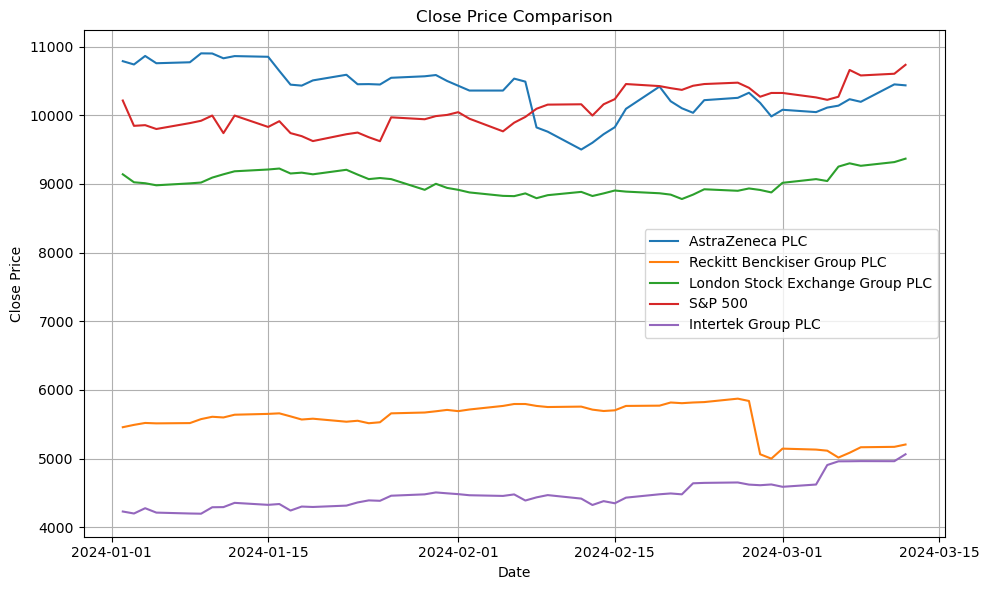

In [25]:

plt.figure(figsize=(10, 6))


plt.plot(pivot_data.index, pivot_data['AZN'], label='AstraZeneca PLC')
plt.plot(pivot_data.index, pivot_data['RKT'], label='Reckitt Benckiser Group PLC')
plt.plot(pivot_data.index, pivot_data['LSEG'], label='London Stock Exchange Group PLC')
plt.plot(pivot_data.index, pivot_data['SPX'], label='S&P 500')
plt.plot(pivot_data.index, pivot_data['ITRK'], label='Intertek Group PLC')


plt.title('Close Price Comparison')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.legend()


plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
fig.write_html("time_series.html")

# Analysis of Stock Volatility

In [27]:
volatile = pivot_data.std()
volatile = volatile.sort_values(ascending=False)
top_5_volatile = volatile.head(5)
fig = px.bar(
    top_5_volatile,
    x=top_5_volatile.index,
    y=top_5_volatile.values,
    labels={
        'y':'Standard Deviation',
        'x' : 'Ticker'
    },
    title= "Top 5 Ticker Standard Deviation (Highest Volatility)"
)
fig.show()
    

In [28]:
fig.write_html("volatility.html")

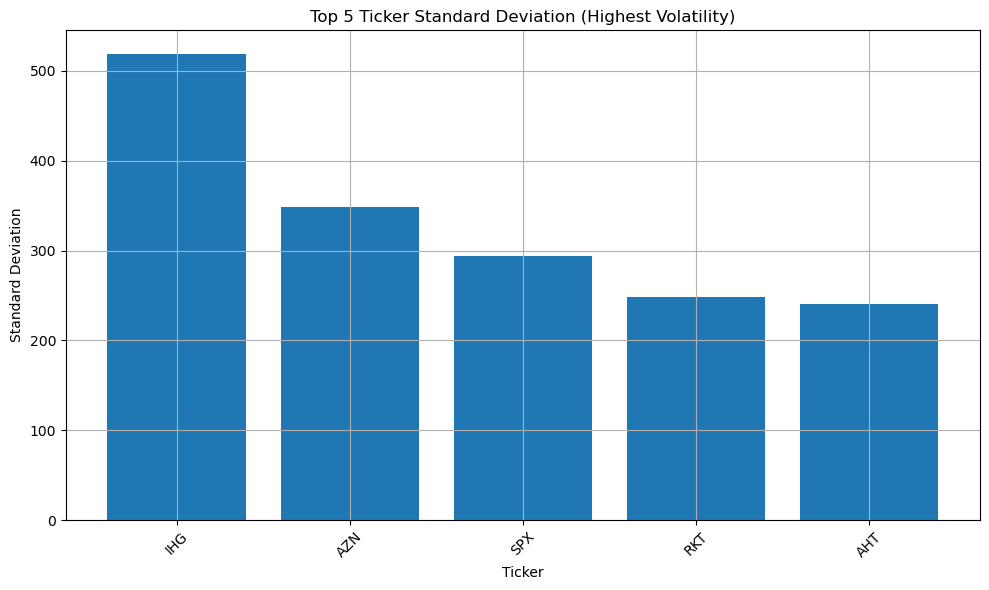

In [39]:

volatile = pivot_data.std()
volatile = volatile.sort_values(ascending=False)
top_5_volatile = volatile.head(5)


plt.figure(figsize=(10, 6))


plt.bar(top_5_volatile.index, top_5_volatile.values)


plt.title('Top 5 Ticker Standard Deviation (Highest Volatility)')
plt.xlabel('Ticker')
plt.ylabel('Standard Deviation')


plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


IHG and AZN expeirenced higher price swings and showed greater price variability compared to SPX, RKT and AHT 

# Correlation Analysis

In [29]:
pivot_data

Ticker,inf,AAF,AAL,ABF,ADM,AHT,ANTO,ATST,AUTO,AV,...,TSCO,TW,ULVR,UTG,UU,VOD,VTY,WEIR,WISE,WTB
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,773.2,129.70,1968.2,2371.0,2681.0,5338.0,1651.5,1102.0,703.0,433.7,...,293.1,144.15,3824.5,1041.0,1044.0,69.76,909.5,1898.5,846.4,3615.0
2024-01-03,769.2,128.50,1869.0,2370.0,2684.0,5284.0,1592.5,1096.0,697.2,429.8,...,297.8,142.80,3853.0,1030.0,1054.0,69.51,896.0,1861.0,826.0,3573.0
2024-01-04,775.0,127.80,1873.2,2374.0,2700.0,5246.0,1604.5,1096.0,695.4,433.0,...,302.4,144.20,3842.5,1032.0,1063.5,70.45,902.0,1860.0,840.0,3581.0
2024-01-05,768.0,126.00,1870.8,2346.0,2688.0,5098.0,1616.5,1092.0,691.8,433.3,...,300.9,144.40,3829.0,1031.0,1057.5,70.40,904.0,1851.5,834.6,3559.0
2024-01-08,774.8,128.10,1846.8,2363.0,2721.0,5056.0,1609.5,1090.0,705.0,435.9,...,303.5,148.25,3832.0,1046.0,1045.5,69.98,965.5,1862.5,845.6,3589.0
2024-01-09,779.0,129.40,1823.8,2350.0,2722.0,4982.0,1596.0,1104.0,709.2,433.6,...,300.5,146.05,3860.0,1039.0,1054.5,70.01,959.0,1848.0,862.6,3548.0
2024-01-10,785.2,129.80,1823.2,2336.0,2569.0,4969.0,1583.0,1108.0,710.0,427.4,...,296.4,148.40,3832.0,1036.0,1054.0,68.62,993.0,1855.5,885.0,3550.0
2024-01-11,765.6,129.70,1839.8,2254.0,2571.0,4900.0,1588.0,1102.0,698.0,422.6,...,292.4,143.55,3795.5,1023.0,1033.0,67.11,967.5,1831.5,888.4,3632.0
2024-01-12,754.6,131.60,1846.2,2265.0,2582.0,4909.0,1636.0,1106.0,704.6,428.0,...,296.9,144.05,3845.5,1038.0,1049.5,67.48,972.0,1847.5,882.4,3661.0


In [30]:
tickers_of_interest = ['AZN', 'RKT', 'LSEG', 'SPX', 'ITRK']
filtered_data = pivot_data[tickers_of_interest]
correlation_matrix = filtered_data.corr()
heatmap = go.Heatmap(
    z=correlation_matrix,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns.tolist(),
    colorscale='blues',
    colorbar=dict(title='Correlation'),
    text=correlation_matrix.round(2).values,
    texttemplate="%{text}"
)

# Create the figure object and add heatmap
fig = go.Figure(data=[heatmap])

# Update layout properties
fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title="Ticker",
    yaxis_title="Ticker"
)

# Display the heatmap
fig.show()

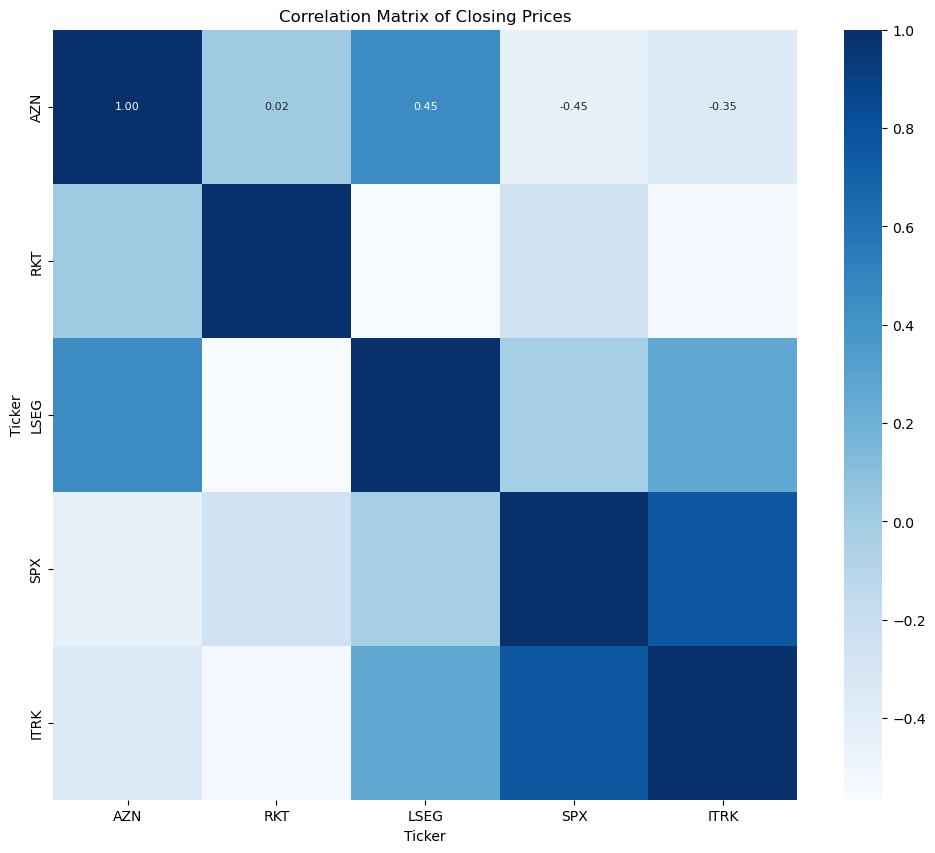

In [42]:



tickers_of_interest = ['AZN', 'RKT', 'LSEG', 'SPX', 'ITRK']
filtered_data = pivot_data[tickers_of_interest]
correlation_matrix = filtered_data.corr()


plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", annot_kws={"size": 8})  


plt.title('Correlation Matrix of Closing Prices')
plt.xlabel('Ticker')
plt.ylabel('Ticker')


plt.show()


In [31]:
fig.write_html("heatmap.html")

# Comparative Analysis

In [32]:
percentage_change = ((filtered_data.iloc[-1] - filtered_data.iloc[0]) / filtered_data.iloc[0]) * 100
fig = px.bar(
    percentage_change,
    x=percentage_change.index,
    y=percentage_change.values,
    labels={'y': 'Percentage Change (%)', 'x': 'Ticker'},
    title='Percentage Change in Closing Prices'
    )
fig.show()

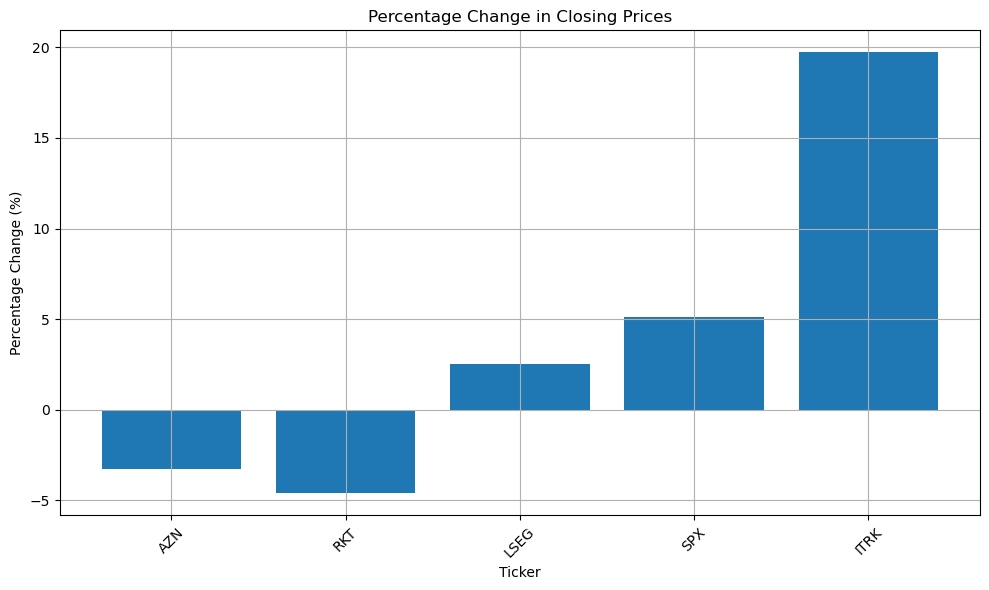

In [43]:
plt.figure(figsize=(10, 6))


plt.bar(percentage_change.index, percentage_change.values)


plt.title('Percentage Change in Closing Prices')
plt.xlabel('Ticker')
plt.ylabel('Percentage Change (%)')


plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
fig.write_html("percentage_change_in_closing_prices.html")

- ITRK had the highest percentage change of 19.3%
- SPX and LSEG also had positive percentage changes 
- RKT had the higest negative significant price changes (-4.6%) - slight reduction in stocks

# Daily Risk vs Return 

In [34]:
pip install plotly-orca

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement plotly-orca (from versions: none)
ERROR: No matching distribution found for plotly-orca


In [35]:
pip install plotly

In [36]:
daily_returns = filtered_data.pct_change().dropna()
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

risk_return_df = pd.DataFrame({'Risk':risk,'Average Daily Return':avg_daily_return})

fig = go.Figure()


fig.add_trace(
    go.Scatter(
        x=risk_return_df["Risk"],
        y=risk_return_df['Average Daily Return'],
        mode="markers+text",
        text=risk_return_df.index,  # Text labels are asset names from the DataFrame index
        textposition="bottom right",  # Move labels to bottom right for better visibility
        marker=dict(size=10, color='limegreen')
    )
)

fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False,
    margin=dict(l=50, r=50, b=50, t=50),
    plot_bgcolor='white',
)

fig.update_xaxes(range=[risk_return_df['Risk'].min() - risk_return_df['Risk'].std() * 0.1,
                         risk_return_df['Risk'].max() + risk_return_df['Risk'].std() * 0.1])
fig.update_yaxes(range=[avg_daily_return.min() - avg_daily_return.std() * 0.1,
                         avg_daily_return.max() + avg_daily_return.std() * 0.1])

fig.update_layout(
    width=800,  # Adjust width as desired (e.g., 800 pixels)
    height=600,  # Adjust height as desired (e.g., 600 pixels)
    # ... other layout options
)

fig.show()



- ITRK shows a moderate level of risk with the highest average daily returns suggesting a stable investment with a more consistent return
- RKT has high volatility and slightly negative avergae daily return which is indicative of a high risk low reward investment within this period
- SPX shows moderate levels of risk with moderate levels of return whch is a more stable and expected investment return

C:\Users\zeine\AppData\Local\Temp\ipykernel_13848\2442154003.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



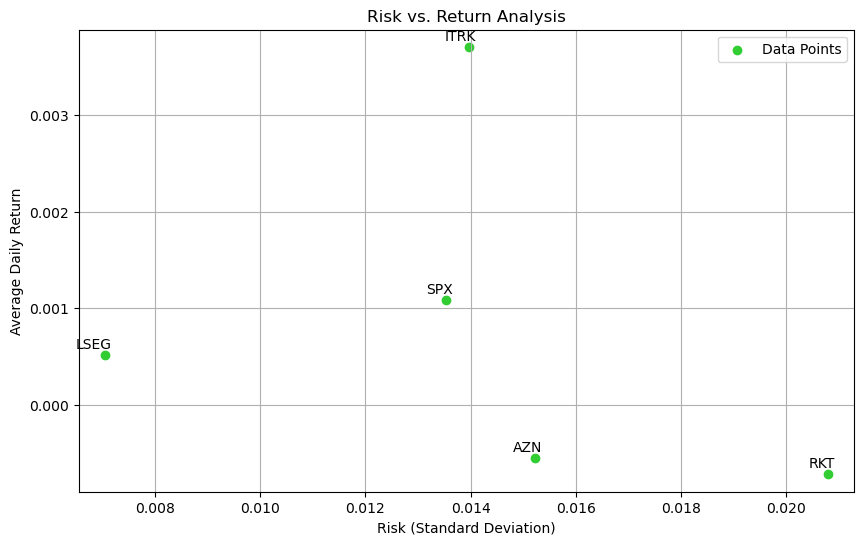

In [37]:
import matplotlib.pyplot as plt
import pandas as pd


daily_returns = filtered_data.pct_change().dropna()
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()


risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})


plt.figure(figsize=(10, 6))


plt.scatter(risk_return_df["Risk"], risk_return_df['Average Daily Return'], color='limegreen', label='Data Points')


for i, txt in enumerate(risk_return_df.index):
    plt.annotate(txt, (risk_return_df["Risk"][i], risk_return_df['Average Daily Return'][i]),
                 textcoords="offset points", xytext=(5,5), ha='right')


plt.title('Risk vs. Return Analysis')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Average Daily Return')


plt.xlim(risk_return_df['Risk'].min() - risk_return_df['Risk'].std() * 0.1,
         risk_return_df['Risk'].max() + risk_return_df['Risk'].std() * 0.1)
plt.ylim(avg_daily_return.min() - avg_daily_return.std() * 0.1,
         avg_daily_return.max() + avg_daily_return.std() * 0.1)


plt.grid(True)


plt.legend()
plt.show()


In [38]:
plt.savefig("risk.jpeg")

<Figure size 640x480 with 0 Axes>